In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_loan=pd.read_csv("loan_prediction.csv")
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df_loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df_loan.shape

(614, 13)

In [7]:
df_loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df_loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df_loan.columns.to_series().groupby(df_loan.dtypes).groups

{dtype('int64'): Index(['ApplicantIncome'], dtype='object'),
 dtype('float64'): Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
        'Credit_History'],
       dtype='object'),
 dtype('O'): Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'Property_Area', 'Loan_Status'],
       dtype='object')}

In [11]:
#Count of unique values
for column in df_loan.columns:
    print(column,df_loan[column].nunique())
    
#Loan Id is unique in all rows,so it can be dropped

Loan_ID 614
Gender 2
Married 2
Dependents 4
Education 2
Self_Employed 2
ApplicantIncome 505
CoapplicantIncome 287
LoanAmount 203
Loan_Amount_Term 10
Credit_History 2
Property_Area 3
Loan_Status 2


In [12]:
#Values counts 
for column in df_loan.columns:
    print("********")
    print(column,":",df_loan[column].unique())
    print(df_loan[column].value_counts())
    print("Mode for",column,"is",df_loan[column].mode()[0])

********
Loan_ID : ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282

In [13]:
#Fill categorical data with mode
for column in ['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History']:
    df_loan[column].fillna(df_loan[column].mode()[0], inplace=True)

In [14]:
df_loan['LoanAmount'].fillna(df_loan['LoanAmount'].median(), inplace=True)


In [15]:
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
#Again check for null values
df_loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
#Dropping loan id column
df_loan.drop("Loan_ID", axis=1,inplace=True)

In [18]:
df_loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


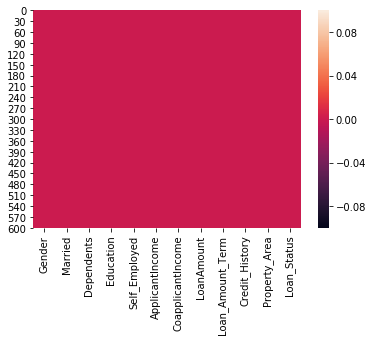

In [19]:
sns.heatmap(df_loan.isnull())

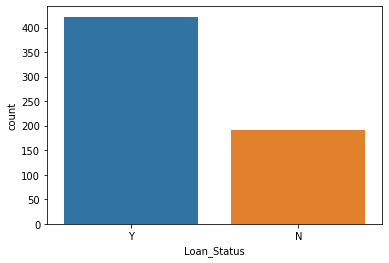

In [20]:
sns.countplot(x='Loan_Status',data=df_loan)
#Loan status Approved Y is high compared to N

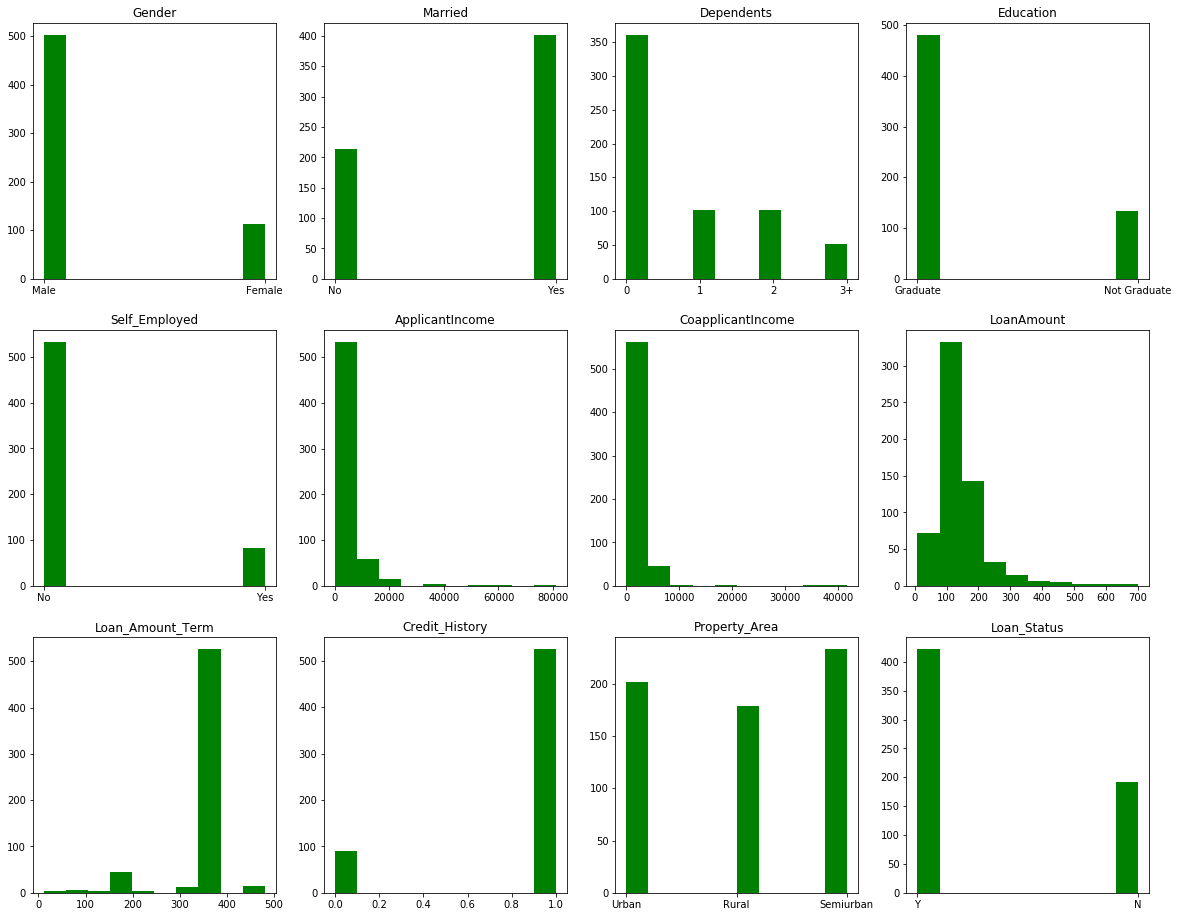

In [21]:
plt.figure(figsize=(20,16))
for i, col in enumerate(df_loan.columns):
    plt.subplot(3, 4, i + 1)
    plt.hist(df_loan[col], color='green', bins=10)
    plt.title(col)

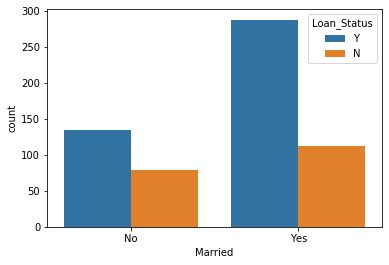

In [22]:
sns.countplot(x='Married', hue='Loan_Status',data=df_loan)

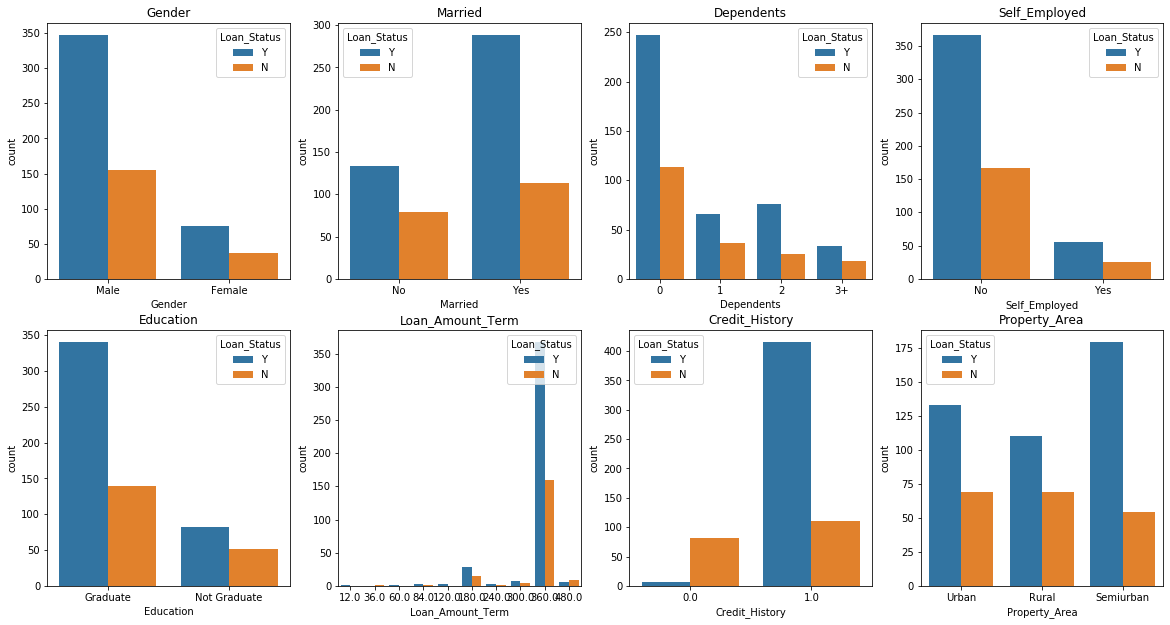

In [23]:
column=['Gender','Married','Dependents','Self_Employed','Education','Loan_Amount_Term','Credit_History','Property_Area']
plt.figure(figsize=(20,16))
for i, col in enumerate(column):
    plt.subplot(3, 4, i + 1)
    sns.countplot(x=col,hue='Loan_Status',data=df_loan)
    plt.title(col)
#Males,Married,Dependents with 0,Graduate,Semi Urban and better Credit history  have higher loan approval
#Self employed has less percentage of loan status approved
#Loan term for most application is  360

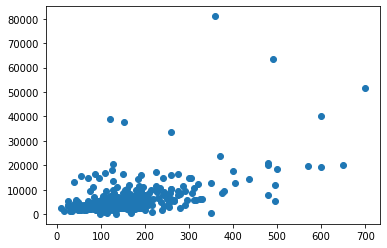

In [24]:
plt.scatter(x='LoanAmount',y='ApplicantIncome',data=df_loan)
plt.show()
#loan amount is heavily concentrated around 50-300

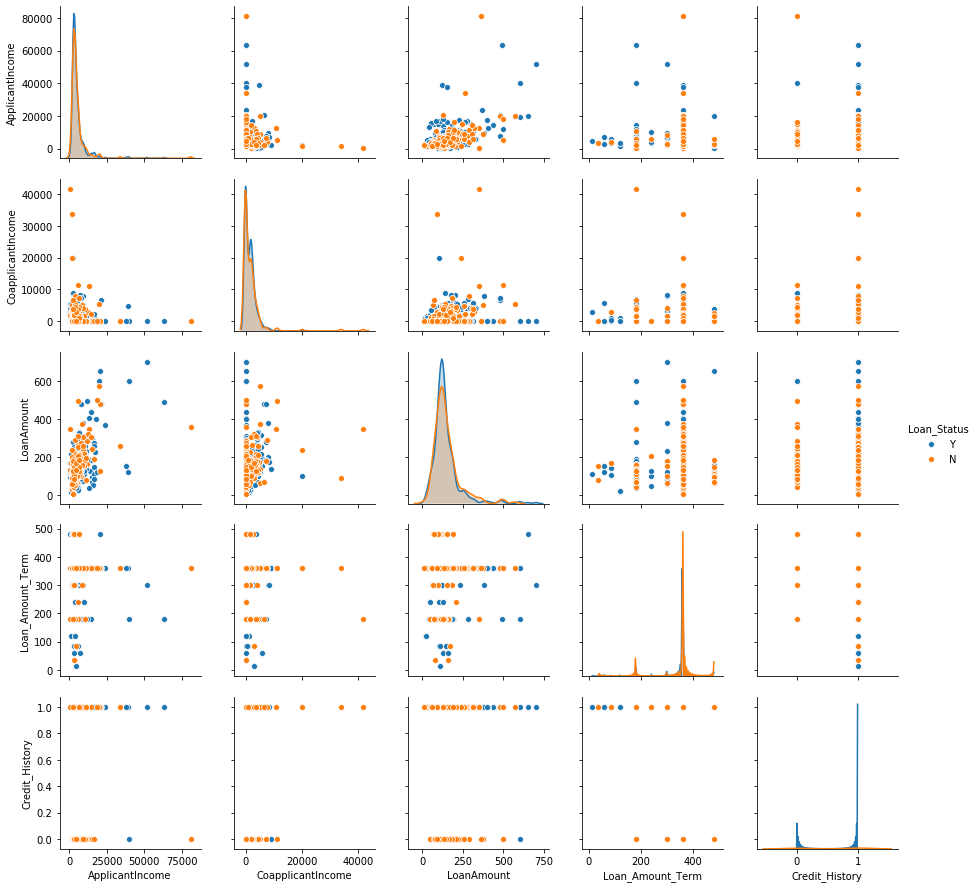

In [25]:
sns.pairplot(df_loan,hue='Loan_Status')

In [26]:
#Converting categorical data into Numeric
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_loan['Gender']=le.fit_transform(df_loan['Gender'])
df_loan['Married']=le.fit_transform(df_loan['Married'])
df_loan['Education']=le.fit_transform(df_loan['Education'])
df_loan['Self_Employed']=le.fit_transform(df_loan['Self_Employed'])
df_loan['Property_Area']=le.fit_transform(df_loan['Property_Area'])
df_loan['Loan_Status']=le.fit_transform(df_loan['Loan_Status'])
df_loan['Dependents']=le.fit_transform(df_loan['Dependents'])

In [27]:
df_loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [28]:
df_loan.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

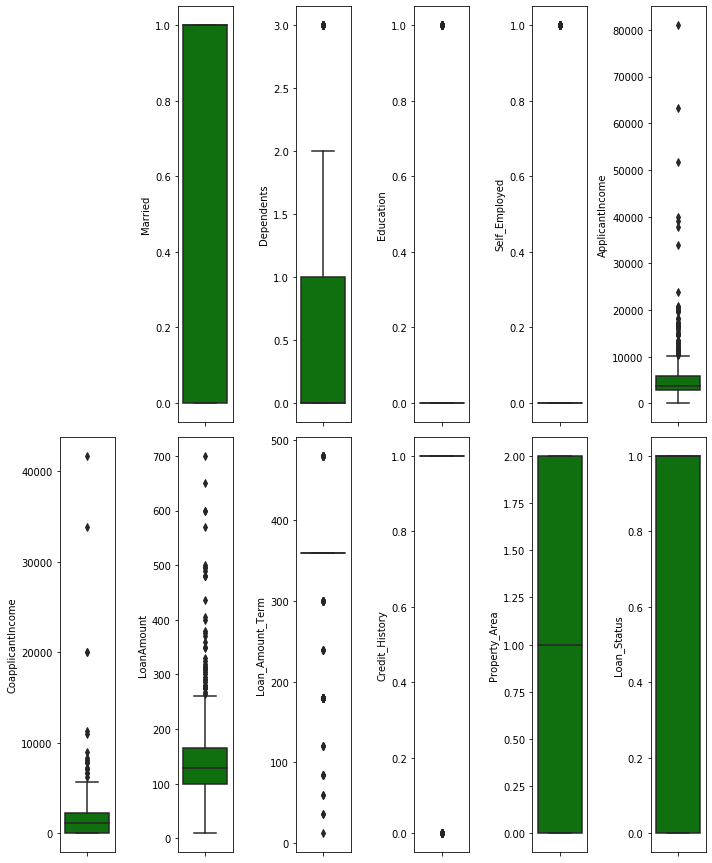

In [29]:
collist = df_loan.columns.values
plt.figure(figsize=(10,30))
for i in range(1,len(collist)):
    plt.subplot(5,6, i + 1)
    sns.boxplot(df_loan[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [30]:
df_loan.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556


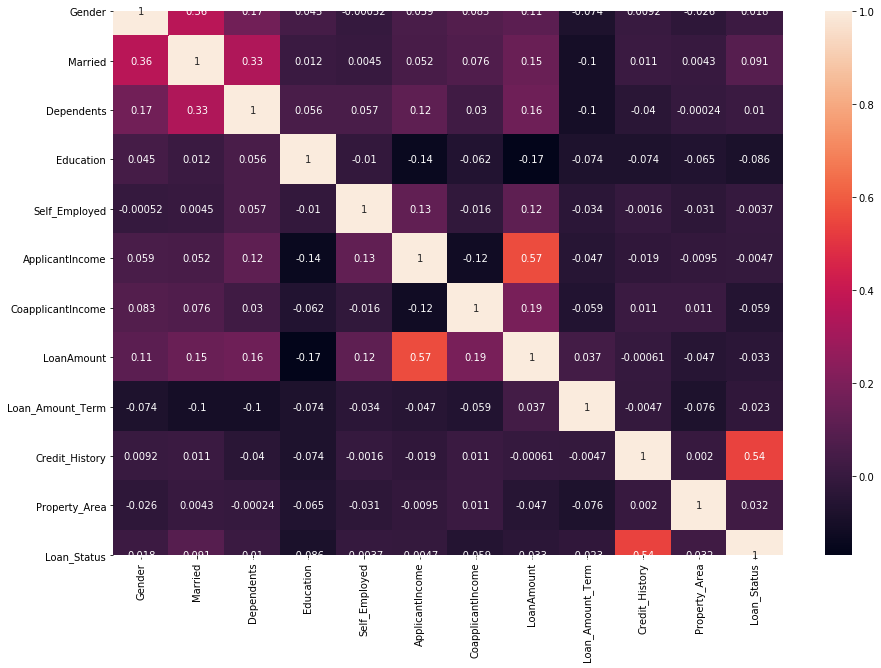

In [31]:
plt.subplots(figsize=(15,10))
sns.heatmap(df_loan.corr(),annot=True)
plt.show()
#Loan status shows positive correlation with credit history,property area

In [32]:
#Check for presence of outliers
from scipy.stats import zscore
z_scr=zscore(df_loan)
df_loan_final=df_loan.loc[(abs(z_scr)<3).all(axis=1)]
print(df_loan_final.shape)

(577, 12)


In [33]:
df_loan.shape
#Outliers were present

(614, 12)

In [34]:
#Skewness check
df_loan_final.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [35]:
#Removing skewness
import numpy as np
for index in df_loan_final.skew().index:
    if df_loan_final.skew().loc[index]>0.5:
        df_loan_final[index]=np.sqrt(df_loan_final[index])

In [36]:
df_loan_final.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.610338
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      1.208613
CoapplicantIncome    0.207591
LoanAmount           0.359495
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [37]:
df_x=df_loan_final.iloc[:,:-1]
df_y=df_loan_final.iloc[:,-1]

In [38]:
df_x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.000000,0.0,0.0,76.478755,0.000000,11.313708,360.0,1.0,2
1,1,1,1.000000,0.0,0.0,67.697858,38.832976,11.313708,360.0,1.0,0
2,1,1,0.000000,0.0,1.0,54.772256,0.000000,8.124038,360.0,1.0,2
3,1,1,0.000000,1.0,0.0,50.823223,48.559242,10.954451,360.0,1.0,2
4,1,0,0.000000,0.0,0.0,77.459667,0.000000,11.874342,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.000000,0.0,0.0,53.851648,0.000000,8.426150,360.0,1.0,0
610,1,1,1.732051,0.0,0.0,64.078077,0.000000,6.324555,180.0,1.0,0
611,1,1,1.000000,0.0,0.0,89.844310,15.491933,15.905974,360.0,1.0,2
612,1,1,1.414214,0.0,0.0,87.080423,0.000000,13.674794,360.0,1.0,2


In [39]:
df_y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int32

In [40]:
#Standard scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
df_x=sc.transform(df_x)

In [41]:
df_x

array([[ 0.47713685, -1.36251079, -0.79092456, ...,  0.23085296,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  0.71244441, ...,  0.23085296,
         0.41851254, -1.30652215],
       [ 0.47713685,  0.73393914, -0.79092456, ...,  0.23085296,
         0.41851254,  1.22747207],
       ...,
       [ 0.47713685,  0.73393914,  0.71244441, ...,  0.23085296,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  1.33516023, ...,  0.23085296,
         0.41851254,  1.22747207],
       [-2.09583477, -1.36251079, -0.79092456, ...,  0.23085296,
        -2.38941464, -0.03952504]])

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
def maxacc_score(clf,df_x,df_y):
    maxA=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(df_x, df_y,random_state = r_state,test_size=0.20,stratify=df_y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        tmp=accuracy_score(y_test,y_pred)
        if tmp>maxA:
            maxA=tmp
            rs=r_state
    print("maximum Accuracy is at random state :",rs," and it is :",maxA)
    return rs

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier

In [44]:
KNN=KNeighborsClassifier(n_neighbors=5)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=100)
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
ETC=ExtraTreesClassifier()

In [45]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

*********************** KNeighborsClassifier ***********************


maximum Accuracy is at random state : 50  and it is : 0.8448275862068966
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.84251968503937


Cross_Val_Score =  0.7799325900959294


roc_auc_score =  0.7792832167832169


classification_report
               precision    recall  f1-score   support

           0       0.83      0.62      0.71        39
           1       0.85      0.94      0.89        88

    accuracy                           0.84       127
   macro avg       0.84      0.78      0.80       127
weighted avg       0.84      0.84      0.84       127



[[24 15]
 [ 5 83]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


maximum Accuracy is at random state : 82  and it is : 0.8706896551724138
SVC(C=

maximum Accuracy is at random state : 77  and it is : 0.8620689655172413
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)


Accuracy_score =  0.8661417322834646


Cross_Val_Score =  0.7905852994555354


roc_auc_score =  0.8034673659673659


classification_report
               precision    recall  f1-score   support

           0       0.89      0.64      0.75        39
           1       0.86      0.97      0.91        88

    accuracy                           0.87       127
   macro avg       0.88      0.80      0.83       127
weighted avg       0.87      0.87      0.86       127



[[25 14]
 [ 3 85]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)





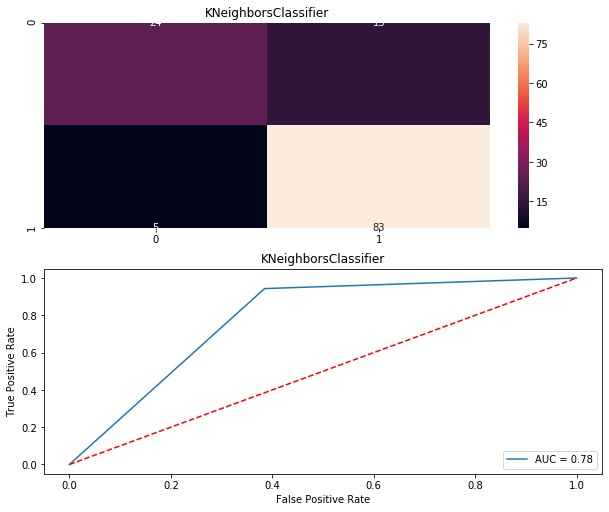

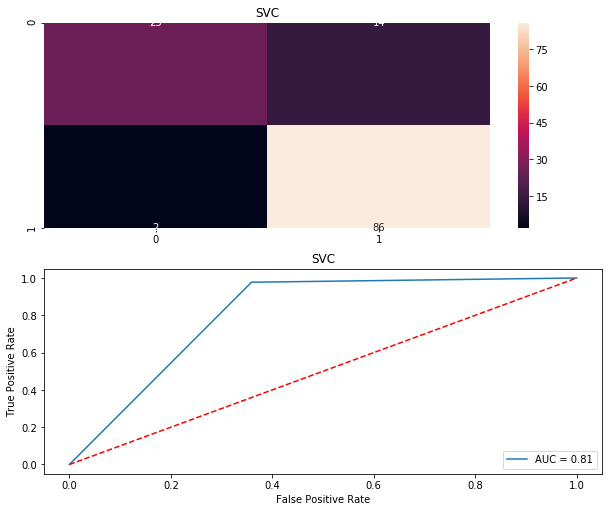

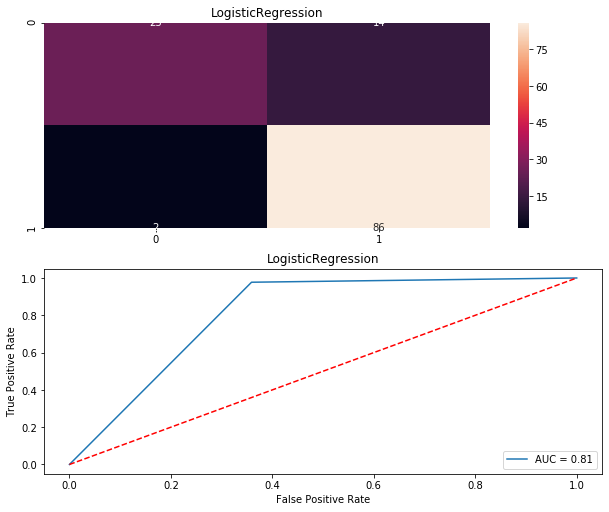

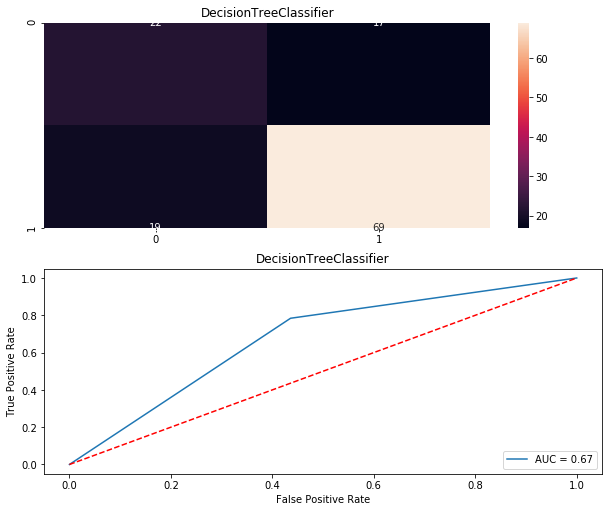

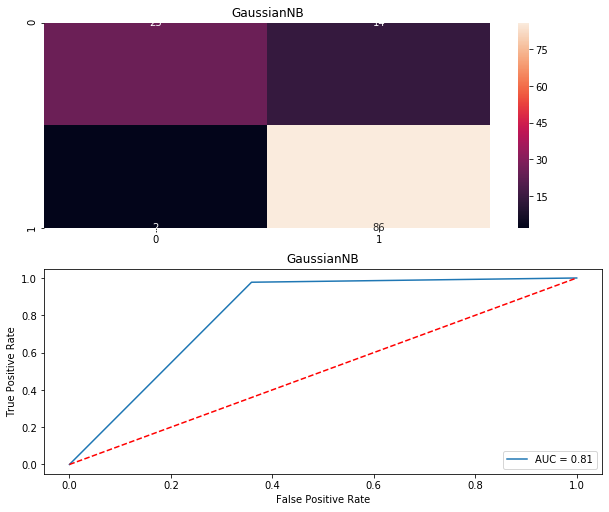

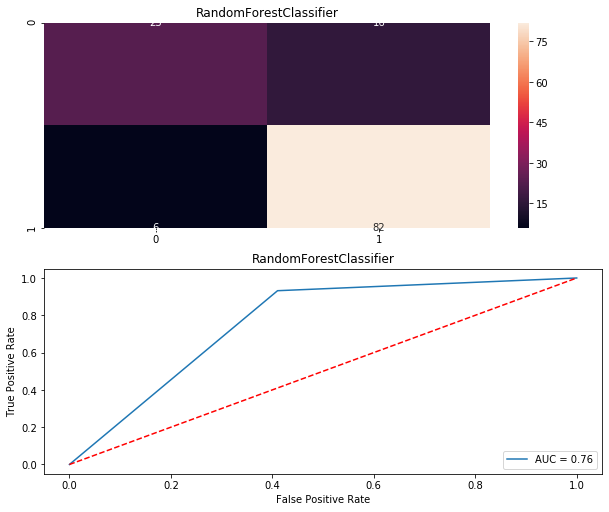

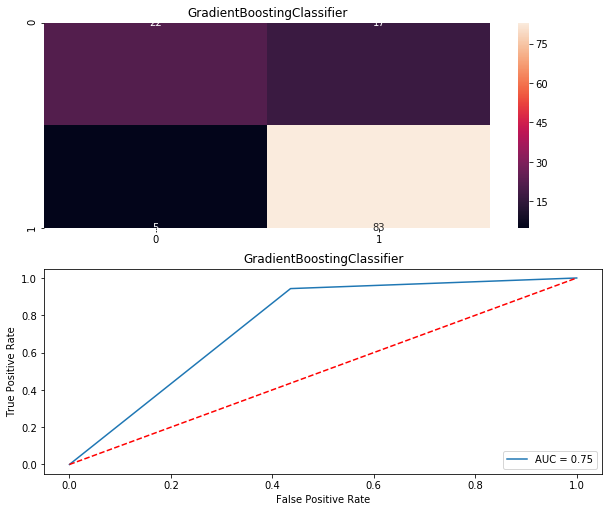

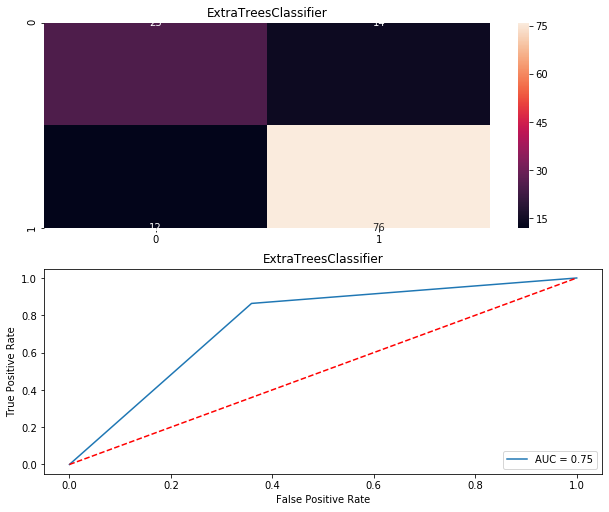

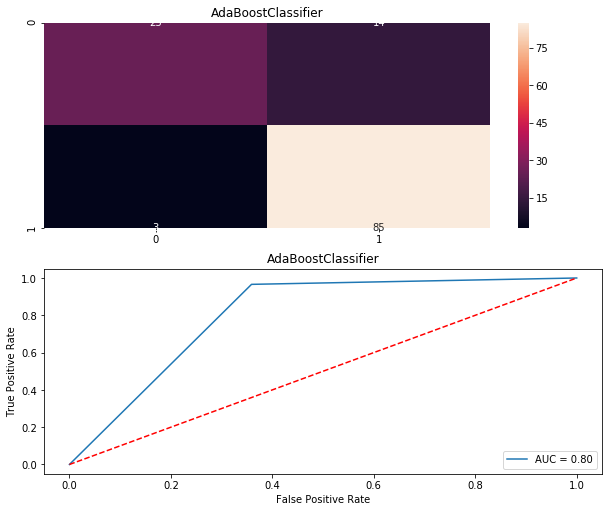

In [46]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    max_random_state= maxacc_score(model,df_x,df_y)
    x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,random_state=max_random_state,test_size=0.22,stratify=df_y)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, df_x, df_y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [47]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,84.251969,77.993259,77.928322
1,SVC,87.401575,81.820175,80.914918
2,LogisticRegression,87.401575,81.820175,80.914918
3,DecisionTreeClassifier,71.653543,70.545653,67.409674
4,GaussianNB,87.401575,81.296884,80.914918
5,RandomForestClassifier,82.677165,80.096038,76.078089
6,GradientBoostingClassifier,82.677165,80.440865,75.364219
7,ExtraTreesClassifier,79.527559,74.517436,75.233100
8,AdaBoostClassifier,86.614173,79.058530,80.346737


Grid Search CV for SVC

In [48]:
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,random_state=82,test_size=0.22,stratify=df_y)
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid_svc = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=10)
grid_svc.fit(x_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] .

[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .................... C=1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C

[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] .

[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] .

[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .

[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   33.8s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [49]:
print(grid_svc.best_estimator_)
print(grid_svc.best_score_)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.8044444444444444


In [50]:
grid_svc_pred = grid_svc.predict(x_test)
print("Confusion matrix \n",confusion_matrix(y_test,grid_svc_pred))
print("f1 score is : ",f1_score(y_test,grid_svc_pred))
print("Accuracy score is : ",accuracy_score(y_test,grid_svc_pred))
print("classification report \n",classification_report(y_test,grid_svc_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,grid_svc_pred))

Confusion matrix 
 [[25 14]
 [ 2 86]]
f1 score is :  0.9148936170212766
Accuracy score is :  0.8740157480314961
classification report 
               precision    recall  f1-score   support

           0       0.93      0.64      0.76        39
           1       0.86      0.98      0.91        88

    accuracy                           0.87       127
   macro avg       0.89      0.81      0.84       127
weighted avg       0.88      0.87      0.87       127

AUC ROC Score:  0.809149184149184


In [51]:
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,random_state=82,test_size=0.22,stratify=df_y)
param_grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg_cv=GridSearchCV(LogisticRegression(),param_grid,cv=10)
logreg_cv.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [52]:
print(logreg_cv.best_params_)
print(logreg_cv.best_score_)

{'C': 0.1, 'penalty': 'l1'}
0.8022222222222222


In [53]:
grid_lr_pred = logreg_cv.predict(x_test)
print("Confusion matrix \n",confusion_matrix(y_test,grid_lr_pred))
print("f1 score is : ",f1_score(y_test,grid_lr_pred))
print("Accuracy score is : ",accuracy_score(y_test,grid_lr_pred))
print("classification report \n",classification_report(y_test,grid_lr_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,grid_lr_pred))

Confusion matrix 
 [[25 14]
 [ 2 86]]
f1 score is :  0.9148936170212766
Accuracy score is :  0.8740157480314961
classification report 
               precision    recall  f1-score   support

           0       0.93      0.64      0.76        39
           1       0.86      0.98      0.91        88

    accuracy                           0.87       127
   macro avg       0.89      0.81      0.84       127
weighted avg       0.88      0.87      0.87       127

AUC ROC Score:  0.809149184149184


In [54]:
pred=logreg_cv.predict(x_test)
print("Prediction:",pred)
print("Actual Value:",grid_lr_pred)

Prediction: [1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1
 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1
 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1]
Actual Value: [1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1
 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1
 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1]


In [55]:
result_comparison = pd.DataFrame({'Predicted Value': pred, 'Actual Value': grid_lr_pred})
result_comparison

,Predicted Value,Actual Value
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
122,0,0
123,1,1
124,1,1
125,1,1


In [56]:
#Lets save Logistic Regression the above model as it provides highest score
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(logreg_cv,'Model_Fraud_Loan Prediction.pkl')

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['Model_Fraud_Loan Prediction.pkl']